In [1]:
import pandas as pd
import gc
from sklearn.model_selection import train_test_split



In [2]:
import importlib
import utils
importlib.reload(utils)


print(dir(utils))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'compute_null_values', 'count_nb_lines', 'count_target_value', 'extract_division_names', 'pa', 'pc', 'pq', 'siren_filter', 'var_filter']


In [3]:
#gestion mémoire  (l'équivalent de free en C)

gc.set_threshold(500, 5, 5)
gc.collect()

18

In [4]:
df_avec_details_financiers=pd.read_parquet("datasets_finaux/dataset_avec_details_financiers.parquet")

In [5]:
print(df_avec_details_financiers.shape)

(36388, 68)


In [6]:
df_avec_details_financiers.head(10) 

,siren,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,etatAdministratifUniteLegale,activitePrincipaleUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,...,Poids_BFR_exploitation_sur_CA_jours_std,Rotation_des_stocks_jours_tcam,Rotation_des_stocks_jours_moyen,Rotation_des_stocks_jours_std,Credit_clients_Jours_tcam,Credit_clients_Jours_moyen,Credit_clients_Jours_std,Credit_fournisseurs_Jours_tcam,Credit_fournisseurs_Jours_moyen,Credit_fournisseurs_Jours_std
0,480086784,-1,0,3,1,2023,1,7022,0,0,...,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.0,43.591,NaN
1,514943323,-1,0,3,1,2023,1,7022,-1,0,...,NaN,0.0,22.369,NaN,0.0,0.000,NaN,0.0,33.286,NaN
2,519715593,2,2023,2,1,2023,1,6209,-1,0,...,NaN,0.0,5.602,NaN,0.0,39.735,NaN,0.0,42.464,NaN
3,520267881,-1,0,2,1,2023,0,7022,0,0,...,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.0,52.993,NaN
4,522761139,21,2023,5,1,2023,1,7022,-1,0,...,NaN,0.0,0.000,NaN,0.0,78.778,NaN,0.0,21.579,NaN
5,522807981,12,2023,3,1,2023,1,6399,-1,0,...,NaN,0.0,37.858,NaN,0.0,70.764,NaN,0.0,152.765,NaN
6,523617173,1,2023,6,1,2023,1,6201,-1,0,...,NaN,0.0,7.751,NaN,0.0,354.581,NaN,0.0,102.188,NaN
7,524157872,-1,0,2,0,0,0,7022,0,0,...,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.0,73.204,NaN
8,524607868,-1,0,4,1,2023,1,6201,-1,0,...,NaN,0.0,0.000,NaN,0.0,23.357,NaN,0.0,0.813,NaN
9,525268975,-1,0,4,1,2023,0,7022,-1,0,...,NaN,0.0,104.706,NaN,0.0,3.013,NaN,0.0,70.758,NaN


In [7]:
#SUPPRESSION DES SIRENS
df_avec_details_financiers=df_avec_details_financiers.drop(["siren"],axis=1) 

In [8]:
df_avec_details_financiers.columns 

Index(['trancheEffectifsUniteLegale', 'anneeEffectifsUniteLegale',
       'nombrePeriodesUniteLegale', 'categorieEntreprise',
       'anneeCategorieEntreprise', 'etatAdministratifUniteLegale',
       'activitePrincipaleUniteLegale', 'economieSocialeSolidaireUniteLegale',
       'societeMissionUniteLegale', 'nbEtablissements',
       'Chiffre_d_affaires_tcam', 'Chiffre_d_affaires_moyen',
       'Chiffre_d_affaires_std', 'Marge_brute_tcam', 'Marge_brute_moyen',
       'Marge_brute_std', 'EBE_tcam', 'EBE_moyen', 'EBE_std', 'EBIT_tcam',
       'EBIT_moyen', 'EBIT_std', 'Resultat_net_tcam', 'Resultat_net_moyen',
       'Resultat_net_std', 'Taux_d_endettement_tcam',
       'Taux_d_endettement_moyen', 'Taux_d_endettement_std',
       'Ratio_de_liquidite_tcam', 'Ratio_de_liquidite_moyen',
       'Ratio_de_liquidite_std', 'Ratio_de_vetuste_tcam',
       'Ratio_de_vetuste_moyen', 'Ratio_de_vetuste_std',
       'Autonomie_financiere_tcam', 'Autonomie_financiere_moyen',
       'Autonomie_financier

In [9]:
df_avec_details_financiers.var()

trancheEffectifsUniteLegale        1.527636e+01
anneeEffectifsUniteLegale          9.359101e+05
nombrePeriodesUniteLegale          1.211760e+00
categorieEntreprise                2.281899e-01
anneeCategorieEntreprise           5.726366e+05
                                       ...     
Credit_clients_Jours_moyen         1.098621e+08
Credit_clients_Jours_std           2.151265e+08
Credit_fournisseurs_Jours_tcam     2.827669e+06
Credit_fournisseurs_Jours_moyen    3.193283e+07
Credit_fournisseurs_Jours_std      7.141303e+07
Length: 67, dtype: float64

In [10]:
proportion_survie_avec_details = (df_avec_details_financiers['etatAdministratifUniteLegale'] == 1).mean() 
print(proportion_survie_avec_details)

0.7539848301637903


In [11]:
def split(dataset,seed=42,yes_validation=False):
    x=dataset.drop(["etatAdministratifUniteLegale"],axis=1)
    y=dataset["etatAdministratifUniteLegale"]
    if(yes_validation==True): #crée un validation set
        x_train, x_temp, y_train, y_temp = train_test_split( x, y, test_size=0.3, random_state=seed,stratify=y ) 
        x_validation, x_test, y_validation, y_test = train_test_split( x_temp, y_temp, test_size=0.5, random_state=seed,stratify=y_temp )
        return x_train,x_test,y_train,y_test,x_validation, y_validation
    else:
        x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=seed,stratify=y )
        return x_train,x_test,y_train,y_test

In [12]:
x_train,x_test,y_train,y_test=split(df_avec_details_financiers,seed=42) #possibilité de changer de dataset

#Avec validation set
#x_train,x_test,y_train,y_test,x_validation, y_validation=split(df_avec_details_financiers,seed=42,yes_validation=True)


In [13]:
x_test.isna().sum()

trancheEffectifsUniteLegale           0
anneeEffectifsUniteLegale             0
nombrePeriodesUniteLegale             0
categorieEntreprise                   0
anneeCategorieEntreprise              0
                                   ... 
Credit_clients_Jours_moyen         3150
Credit_clients_Jours_std           7685
Credit_fournisseurs_Jours_tcam        0
Credit_fournisseurs_Jours_moyen    1628
Credit_fournisseurs_Jours_std      6715
Length: 66, dtype: int64

In [14]:
x_train.isna().sum()

trancheEffectifsUniteLegale            0
anneeEffectifsUniteLegale              0
nombrePeriodesUniteLegale              0
categorieEntreprise                    0
anneeCategorieEntreprise               0
                                   ...  
Credit_clients_Jours_moyen          7380
Credit_clients_Jours_std           18128
Credit_fournisseurs_Jours_tcam         0
Credit_fournisseurs_Jours_moyen     3811
Credit_fournisseurs_Jours_std      15735
Length: 66, dtype: int64

In [16]:
cols_to_fill = [col for col in x_train.columns 
                if col.endswith(('_moyen', '_std'))]

medians_train = x_train[cols_to_fill].median()



for col in cols_to_fill:
    x_train[col] = x_train[col].fillna(medians_train[col])


for col in cols_to_fill:
    x_test[col] = x_test[col].fillna(medians_train[col]) #pour éviter la triche
 
#Avec validation set (à décommenter si usage de validation set)
# for col in cols_to_fill:
#     x_validation[col] = x_validation[col].fillna(medians_train[col]) #pour éviter la triche

In [18]:
x_test.isna().sum().sum()

0

In [17]:
x_train.isna().sum().sum() 

0

In [19]:
y_train.isna().sum() 

0

In [20]:
y_test.isna().sum()

0

In [ ]:
# #LIBERER MEMOIRE

# del df_avec_details_financiers

# gc.collect()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# ============================
# Standardisation des variables
# ============================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [23]:
# ============================
# Régression logistique (baseline)
# ============================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialisation du modèle
log_reg = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

# Entraînement
log_reg.fit(X_train_scaled, y_train)

# Prédictions binaires (0 / 1)
y_pred_log = log_reg.predict(X_test_scaled)

# Probabilités de survie (classe 1)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1] # La probabilité estimée que l’entreprise soit encore active dans quelques années

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("ROC AUC :", roc_auc_score(y_test, y_proba_log))
print(classification_report(y_test, y_pred_log))

# Vérification des probabilités
y_proba_log[:10]

Accuracy : 0.8975909132545571
ROC AUC : 0.9576136128123951
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2686
           1       0.91      0.96      0.93      8231

    accuracy                           0.90     10917
   macro avg       0.88      0.84      0.85     10917
weighted avg       0.90      0.90      0.89     10917



array([0.99330351, 0.98785967, 0.9427692 , 0.65261263, 0.99999692,
       0.63601548, 0.98109662, 0.99277293, 0.99099029, 0.96188773])

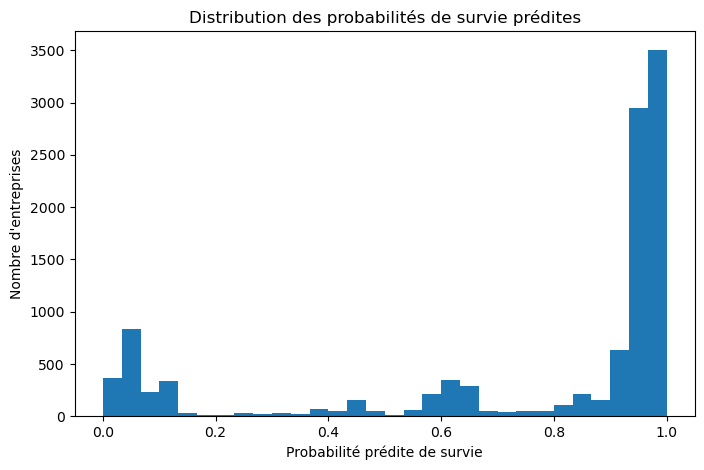

In [24]:
# Distribution des probabilités
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(y_proba_log, bins=30)
plt.xlabel("Probabilité prédite de survie")
plt.ylabel("Nombre d'entreprises")
plt.title("Distribution des probabilités de survie prédites")
plt.show()

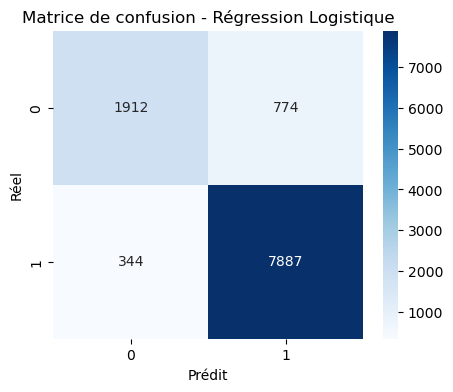

In [25]:
# ============================
# Matrice de confusion
# ============================

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

In [26]:
# ============================
# Analyse des coefficients
# ============================

coefficients = pd.Series(
    log_reg.coef_[0],
    index=x_train.columns
).sort_values()

coefficients.tail(10)
coefficients.head(10) 

nombrePeriodesUniteLegale                  -2.896342
societeMissionUniteLegale                  -0.476406
economieSocialeSolidaireUniteLegale        -0.304809
EBIT_moyen                                 -0.280962
Ratio_de_liquidite_std                     -0.256684
Chiffre_d_affaires_moyen                   -0.229973
EBIT_std                                   -0.108423
Marge_EBE_moyen                            -0.063600
Marge_brute_tcam                           -0.062550
Resultat_courant_avant_impots_sur_CA_std   -0.060189
dtype: float64

In [31]:
# ============================
# LASSO (sélection automatique de variables)
# ============================

lasso = LogisticRegression(
    penalty="l1",
    solver="saga",
    C=0.1,
    max_iter=5000
)

lasso.fit(X_train_scaled, y_train)

coef_lasso = pd.Series(
    lasso.coef_[0],
    index=x_train.columns
)

# Variables sélectionnées (coeff ≠ 0)
selected_features = coef_lasso[coef_lasso != 0].index.tolist()

print("Nombre de variables sélectionnées :", len(selected_features))
selected_features

KeyboardInterrupt: 

In [29]:
# ============================
# Régression logistique après sélection LASSO
# ============================

X_train_sel = scaler.fit_transform(x_train[selected_features])
X_test_sel = scaler.transform(x_test[selected_features])

log_lasso = LogisticRegression(max_iter=1000)
log_lasso.fit(X_train_sel, y_train)

y_proba_lasso = log_lasso.predict_proba(X_test_sel)[:, 1]

print("ROC AUC (LASSO) :", roc_auc_score(y_test, y_proba_lasso))

ROC AUC (LASSO) : 0.9580294489902648


In [30]:
# ============================
# Arbre de décision
# ============================

tree = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=30,
    random_state=42
)

tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)
y_proba_tree = tree.predict_proba(x_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("ROC AUC :", roc_auc_score(y_test, y_proba_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy : 0.9280021984061555
ROC AUC : 0.9793800709646703
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2686
           1       0.94      0.97      0.95      8231

    accuracy                           0.93     10917
   macro avg       0.91      0.89      0.90     10917
weighted avg       0.93      0.93      0.93     10917



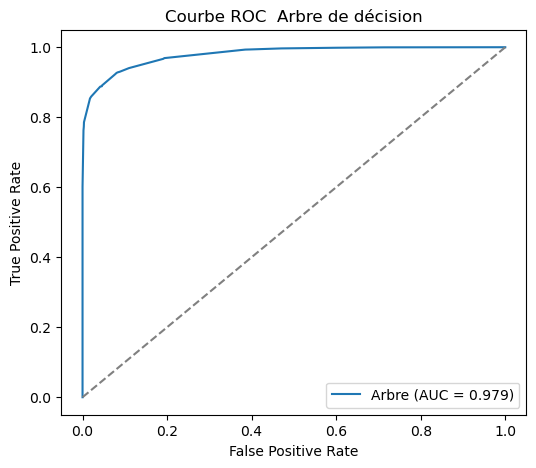

In [32]:
# ============================
# Courbe ROC – Arbre de décision
# ============================

fpr, tpr, _ = roc_curve(y_test, y_proba_tree)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Arbre (AUC = %.3f)" % roc_auc_score(y_test, y_proba_tree))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC  Arbre de décision")
plt.legend()
plt.show()

In [33]:
# ============================
# Random Forest
# ============================

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("ROC AUC :", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy : 0.9003389209489786
ROC AUC : 0.9704841349010828
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      2686
           1       0.89      0.99      0.94      8231

    accuracy                           0.90     10917
   macro avg       0.92      0.81      0.85     10917
weighted avg       0.90      0.90      0.89     10917



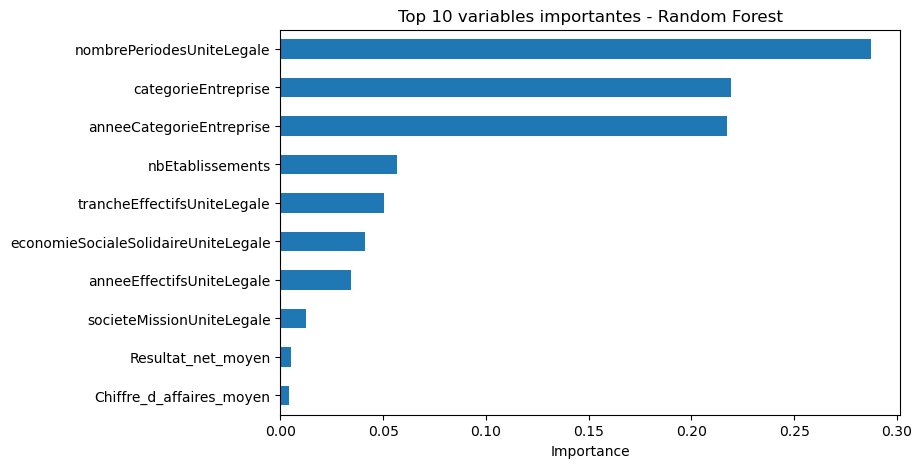

In [34]:
# ============================
# Importance des variables
# ============================

importances = pd.Series(
    rf.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 10 variables importantes - Random Forest")
plt.xlabel("Importance")
plt.show()

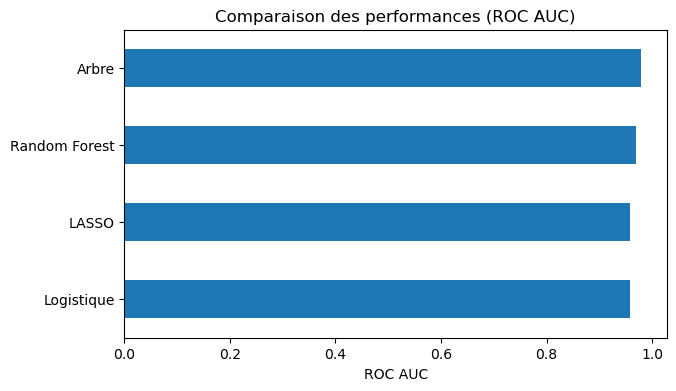

In [35]:
# ============================
# Comparaison des ROC AUC
# ============================

models_auc = {
    "Logistique": roc_auc_score(y_test, y_proba_log),
    "LASSO": roc_auc_score(y_test, y_proba_lasso),
    "Arbre": roc_auc_score(y_test, y_proba_tree),
    "Random Forest": roc_auc_score(y_test, y_proba_rf)
}

pd.Series(models_auc).sort_values().plot(
    kind="barh",
    figsize=(7,4),
    title="Comparaison des performances (ROC AUC)"
)
plt.xlabel("ROC AUC")
plt.show()